# 🚢 Titanic Survival Analysis – Exploratory Data Analysis (EDA)

In this notebook, we explore the Titanic dataset to uncover patterns that influenced passenger survival. We’ll clean the data, visualize key features, and derive actionable insights.


## 1. Data Loading and Initial Exploration




In [10]:
import pandas as pd

df = pd.read_csv(r"C:\Users\LENOVO\Downloads\train (2).csv")  
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Overview of dataset
df.info()

# Statistical summary of numeric columns
df.describe()

#  Value counts for categorical columns
print("Survived:\n", df['Survived'].value_counts())
print("\nPclass:\n", df['Pclass'].value_counts())
print("\nSex:\n", df['Sex'].value_counts())
print("\nEmbarked:\n", df['Embarked'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Survived:
 Survived
0    549
1    342
Name: count, dtype: int64

Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex:
 Sex
male      577
female    314
Name: count, dtype: int64

Embarked:
 Embarked
S    644
C    168
Q     

## 2. Data Cleaning

In [12]:
# Fill missing Age with median
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin due to high missing values
df.drop(columns=['Cabin'], inplace=True)


## 3. Univariate Analysis

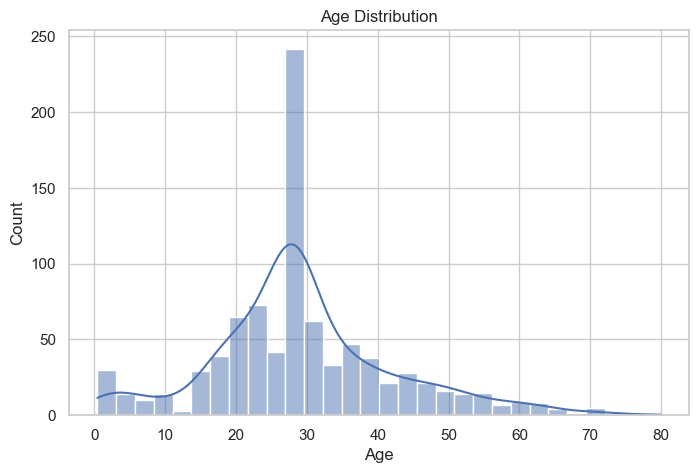

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


###  Age Distribution

- Most passengers are between 20–40 years old.
- Distribution is right-skewed, showing more younger passengers on board.
- A few children and elderly passengers were also present.


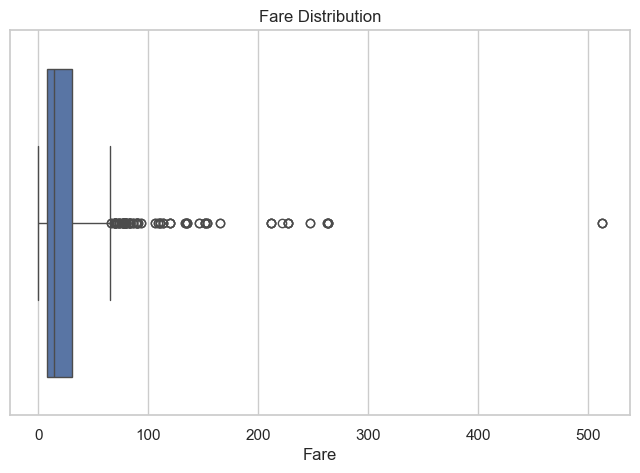

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Fare'])
plt.title("Fare Distribution")
plt.show()


###  Fare Distribution

- Fare distribution is heavily skewed with many outliers.
- Most fares are below $100, but some exceed $500.
- The spread shows a wide range of socioeconomic backgrounds among passengers.


## 4. Bivariate and Multivariate Analysis

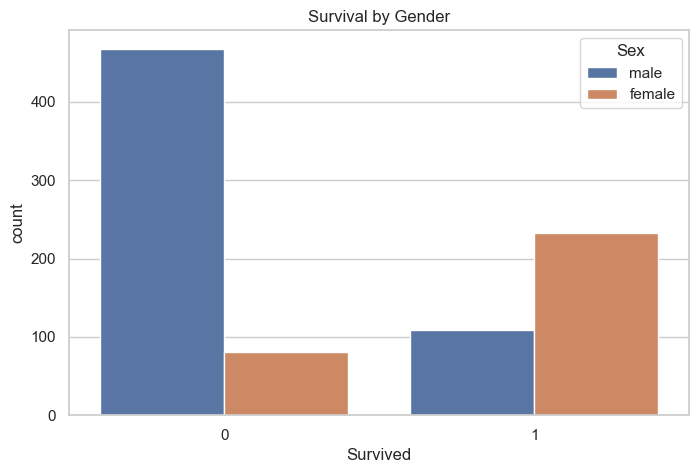

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()


### Survival by Gender

- Female passengers had a much higher survival rate than males.
- This aligns with the "women and children first" policy followed during the evacuation.
- Male survival was significantly lower, regardless of class.


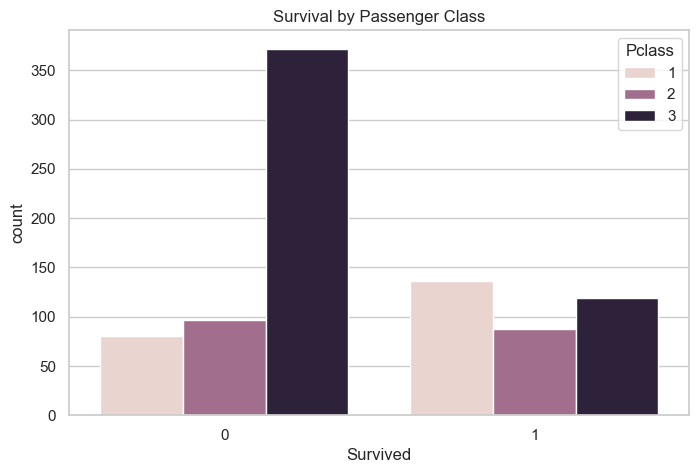

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()


###  Survival by passenger Class

- 1st class passengers had the highest survival rate.
- 3rd class passengers had the lowest survival rate.
- Strong indication that socioeconomic status influenced survival priority.


<Figure size 800x500 with 0 Axes>

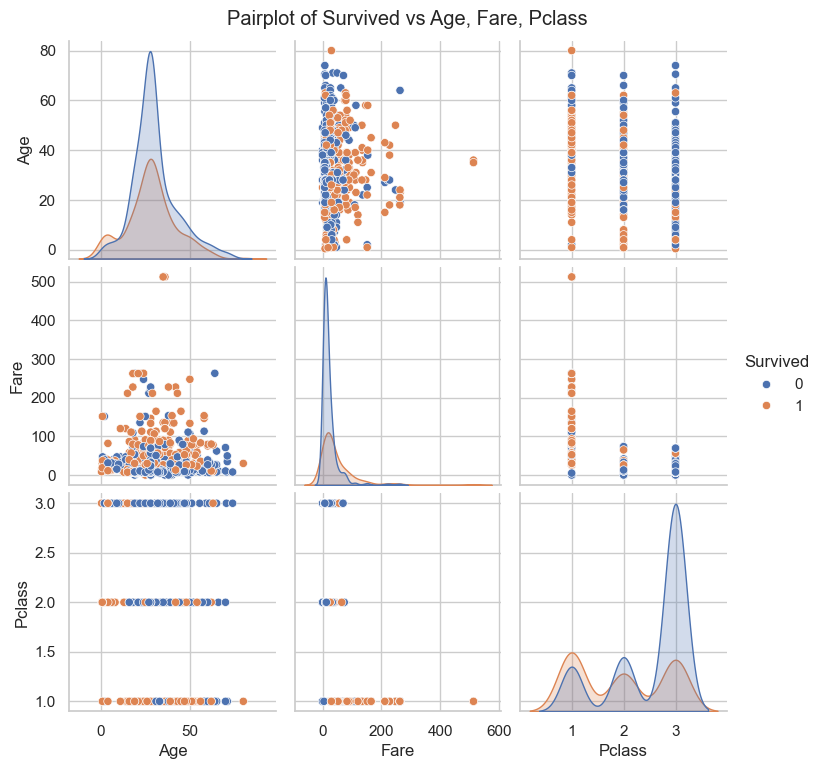

In [19]:
plt.figure(figsize=(8, 5))
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']].dropna(), hue='Survived')
plt.suptitle("Pairplot of Survived vs Age, Fare, Pclass", y=1.02)
plt.show()


Observation – Pairplot of Survived vs Age, Fare, Pclass

- Fare vs Pclass: As expected, 1st class passengers paid higher fares, and many of them survived (orange dots in top fare range).
- Age Distribution: Most passengers were between 20–40 years old, with a slightly right-skewed distribution.
- Survival Trends:
  - Many survivors had mid-to-high fares and belonged to 1st class.
  - In the Age vs Fare plot, survivors cluster around moderate age and higher fare areas.
  - 3rd class passengers (Pclass=3) show high density of non-survivors (blue dots).
- General Pattern: Higher fare and lower class (Pclass=1) seem associated with survival.


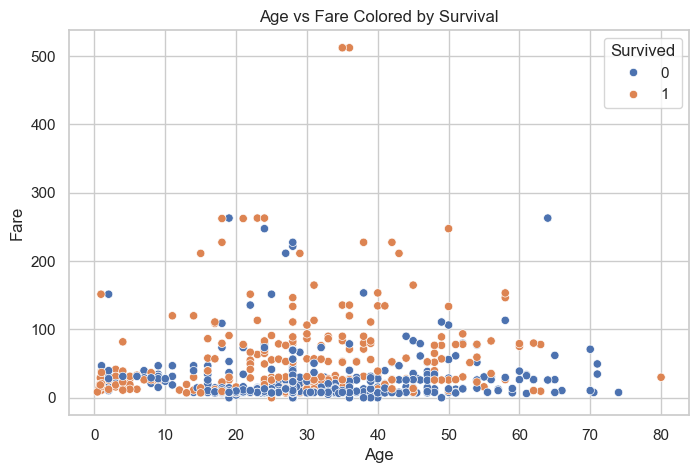

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare Colored by Survival")
plt.show()


###  Age vs Fare Colored by Survival

- Survivors (orange) are more common in higher fare regions.
- Non-survivors (blue) mostly paid lower fares and fall across all age groups.
- Age alone doesn't guarantee survival, but higher fare (i.e., class) seems positively related to survival.


## 5. Correlation Analysis

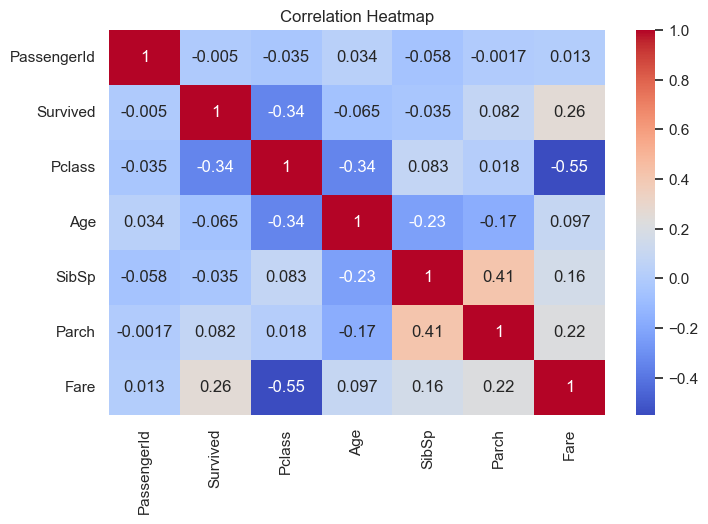

In [22]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


###  Correlation Heatmap

- `Fare` has the strongest positive correlation with survival (0.26).
- `Pclass` has the strongest negative correlation with survival (-0.34).
- Family-related columns (`SibSp`, `Parch`) are moderately correlated with each other.
- `Age`, `Sex`, and `Embarked` are not directly shown here (non-numeric), but Age shows weak correlation.



## 6. Key Observations & Takeaways
- Female and 1st class passengers had higher survival rates.
- Fare shows a positive correlation with survival.
- Most passengers were aged between 20–40.
- Many 3rd class passengers did not survive.